(3)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time

## Batch gradient decend ##
- cost function:$J(\theta)$\
$\nabla_{\theta}J(\theta)=-X^T(y-g(X\theta))$\
where symbols have their usual meaning and g is the sigmoid function\
$g(z)=\frac{1}{1+e^{-z}}$
- update step:\
$\theta:=\theta-\alpha\nabla_{\theta}J(\theta)$

In [3]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [4]:
def grad_j(X,y,theta):
    return -X.T@(y-sigmoid(X@theta))

In [5]:
def initialize_theta(X):
    return np.zeros((X.shape[1],1))

In [6]:
def add_intercept(X):
    x_0=np.ones((X.shape[0],1))
    return np.concatenate((x_0,X),axis=1)

In [27]:
def update(X,y,alpha,theta_,epsilon):
    theta=initialize_theta(X)
    while True:
        theta_.append(theta)
        theta=theta-alpha*grad_j(X,y,theta)
        if np.linalg.norm(theta-theta_[-1])<epsilon:
            break
    return theta,theta_

In [98]:
def predict(X,theta):
    return (sigmoid(X@theta)>0.5).astype(int)

In [107]:
def accuracy(y_test,X_test,theta):
    y_pred=predict(X_test,theta)
    return np.sum((y_pred==y_test).astype(int))/len(y_test)

datasets used-data/ds1_{train,valid}.csv

In [8]:
data=pd.read_csv("data//ds1_train.csv")

In [9]:
data

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0
...,...,...,...
795,3.724697,23.219963,1.0
796,3.139055,5.970538,1.0
797,2.969095,20.249978,1.0
798,3.957531,27.261970,1.0


need to add the intercept 

In [10]:
y_train=data["y"].to_numpy().reshape(-1,1)
X_train=data.drop(["y"],axis=1).to_numpy()

In [11]:
X=add_intercept(X_train)
X

array([[  1.        ,   2.91180854,  60.35961272],
       [  1.        ,   3.77474554, 344.1492843 ],
       [  1.        ,   2.61548828, 178.22208681],
       ...,
       [  1.        ,   2.96909526,  20.24997848],
       [  1.        ,   3.95753102,  27.26196973],
       [  1.        ,   4.02533402,  12.23316511]])

X-x_0,x_1,x_2

In [111]:
alpha=2e-6
epsilon=2e-7
theta_=[]
start_time=time.time()
theta_bgd,theta_=update(X,y_train,alpha,theta_,epsilon)
end_time=time.time()

In [91]:
theta

array([[-6.23160957],
       [ 2.46775314],
       [-0.02985527]])

In [92]:
len(theta_)

703228

In [112]:
end_time-start_time

29.931787967681885

reference values:-[-6.26018491  2.47707251 -0.0299125 ]

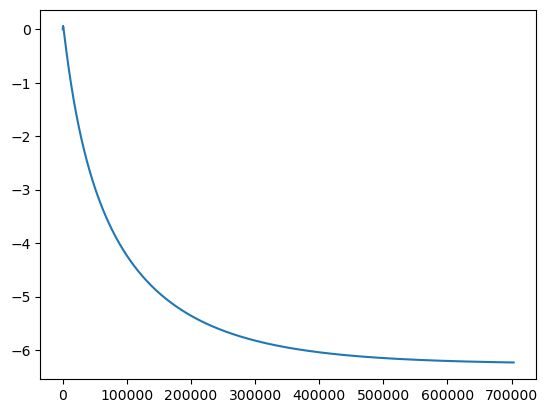

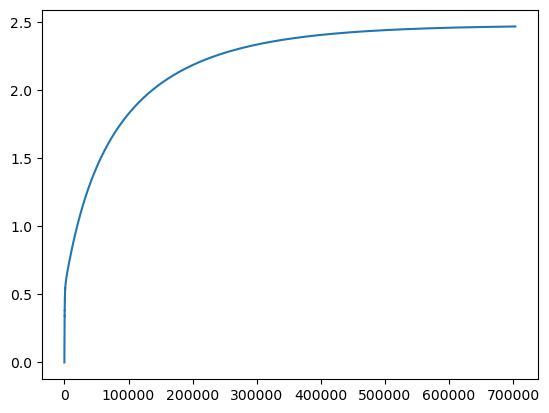

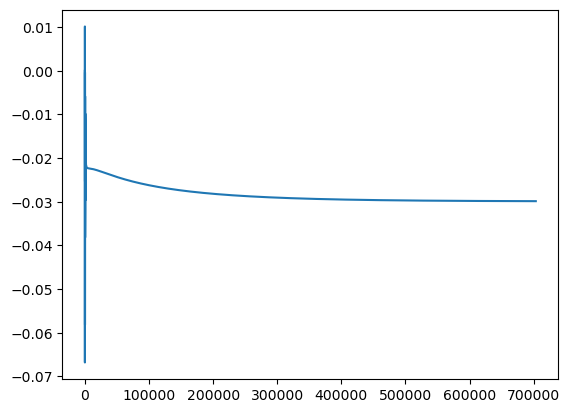

In [93]:
for j in range(3):
    theta__=[]
    for i in range(len(theta_)):
        theta__.append(theta_[i][j])
    plt.plot(theta__)
    plt.show()

## Newton's method
$H=X^Tdiag((g(X\theta)*(1-g(X\theta))^T)X$\
update step\
$\theta:=\theta-H^{-1}\nabla J(\theta)$

In [67]:
def H(X,theta):
    return X.T@np.diag(((sigmoid(X@theta))*(1-sigmoid(X@theta))).flatten())@X

In [85]:
def fit(X,y,epsilon):
    theta=initialize_theta(X)
    theta_=[]
    while True:
        theta_.append(theta)
        theta=theta-np.linalg.inv(H(X,theta))@grad_j(X,y,theta)
        if np.linalg.norm(theta-theta_[-1])<epsilon:
            break
    return theta,theta_

In [113]:
epsilon=2e-6
start_time=time.time()
theta_nr,theta_=fit(X,y_train,epsilon)
end_time=time.time()

In [114]:
end_time-start_time

0.1776289939880371

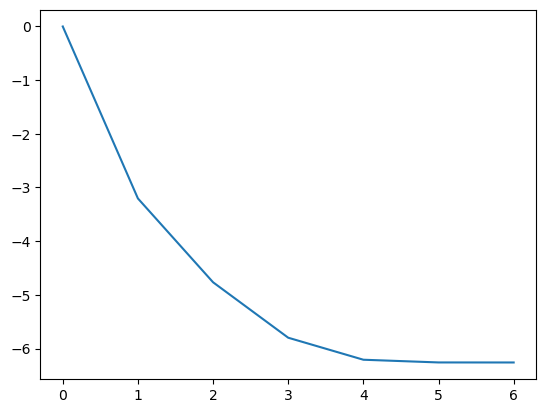

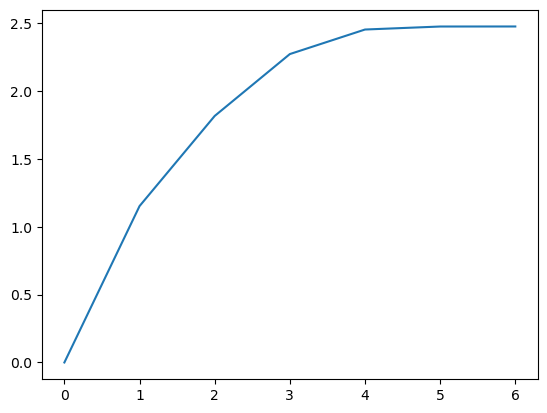

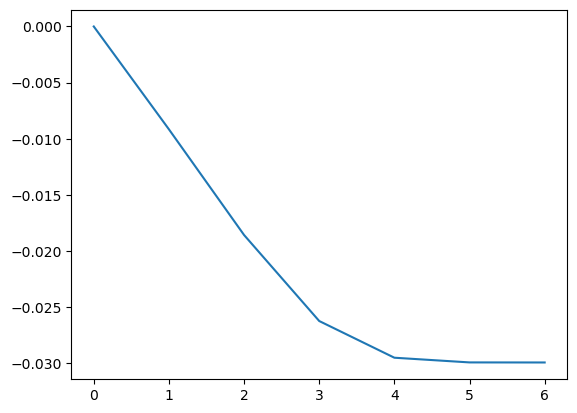

In [88]:
for j in range(3):
    theta__=[]
    for i in range(len(theta_)):
        theta__.append(theta_[i][j])
    plt.plot(theta__)
    plt.show()

## comparison
- **convergence speed:**\
BGD takes much longer(close to 700000 iteration) to converge whereas newtons method takes only 6
- **Robustness to initial condition:**\
BGD is highly dependent on the learning rate whereas newtons method has no such requirement
- **Runtime analysis**:\
BGD is linear in time whereas newtons method is cubic in time(because of inverting a nXn matrix) so newton's method will be better for smaller datasets like this
- **oscillation:**\
bgd is more prone to oscillation whereas newton's method was smoother for this dataset

(4)

(a)when the number of samples is large the variance will be low
- we need to reduce the bias
- so a more flexible model is better

(b)When the number of samples is small a more flexible model will likely overfit.
- with small number of points the model will be unable to capture the true underlying distribution(high bias)
- the problem will be prone to overfitting(high variance)

(c)this is the same as the third case from islr
- we want a more flexible method to capture the non linearity
- the bias variance tradeoff is given by graph
![](c.png)